<a href="https://colab.research.google.com/github/bhargav23/EVA4/blob/master/S9/EVA_S9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')


In [0]:
import albumentations as A
from evaAlbumentations import AlbumentationTransforms
import numpy as np


train_transforms = AlbumentationTransforms(
    [ A.Rotate((-30.0, 30.0)),
      A.HorizontalFlip(),
      A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
      A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
      A.Cutout(num_holes=6)])




test_transforms = AlbumentationTransforms([A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

In [0]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import evadataloader
dataloader = evadataloader.DataLoader()

trainloader = dataloader.load(trainset)
testloader = dataloader.load(testset)

Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  car horse horse horse


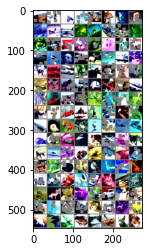

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import evamodel

net = evamodel.ResNet18()

In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import copy

In [0]:
import evascheduler

In [0]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.1341605186462402 Batch_id=390 Accuracy=42.69: 100%|██████████| 391/391 [03:21<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4032, Accuracy: 5968/10000 (59.68%)

EPOCH: 1


Loss=1.0267157554626465 Batch_id=390 Accuracy=58.93: 100%|██████████| 391/391 [03:24<00:00,  2.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3487, Accuracy: 6513/10000 (65.13%)

EPOCH: 2


Loss=1.0609028339385986 Batch_id=390 Accuracy=66.32: 100%|██████████| 391/391 [03:20<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2707, Accuracy: 7293/10000 (72.93%)

EPOCH: 3


Loss=0.7401719093322754 Batch_id=390 Accuracy=70.90: 100%|██████████| 391/391 [03:22<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2131, Accuracy: 7869/10000 (78.69%)

EPOCH: 4


Loss=0.9002877473831177 Batch_id=390 Accuracy=73.43: 100%|██████████| 391/391 [03:20<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2378, Accuracy: 7622/10000 (76.22%)

EPOCH: 5


Loss=0.6243163347244263 Batch_id=390 Accuracy=75.51: 100%|██████████| 391/391 [03:24<00:00,  2.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1785, Accuracy: 8215/10000 (82.15%)

EPOCH: 6


Loss=0.7063648104667664 Batch_id=390 Accuracy=80.60: 100%|██████████| 391/391 [03:22<00:00,  2.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1455, Accuracy: 8545/10000 (85.45%)

EPOCH: 7


Loss=0.3460537791252136 Batch_id=390 Accuracy=81.88: 100%|██████████| 391/391 [03:25<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1416, Accuracy: 8584/10000 (85.84%)

EPOCH: 8


Loss=0.5058093070983887 Batch_id=390 Accuracy=82.57: 100%|██████████| 391/391 [03:18<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1390, Accuracy: 8610/10000 (86.10%)

EPOCH: 9


Loss=0.5511108636856079 Batch_id=390 Accuracy=83.12: 100%|██████████| 391/391 [03:22<00:00,  2.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1370, Accuracy: 8630/10000 (86.30%)

EPOCH: 10


Loss=0.42645758390426636 Batch_id=390 Accuracy=83.33: 100%|██████████| 391/391 [03:21<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1328, Accuracy: 8672/10000 (86.72%)

EPOCH: 11


Loss=0.3631015419960022 Batch_id=390 Accuracy=83.79: 100%|██████████| 391/391 [03:22<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1344, Accuracy: 8656/10000 (86.56%)

EPOCH: 12


Loss=0.4867035746574402 Batch_id=390 Accuracy=84.52: 100%|██████████| 391/391 [03:21<00:00,  2.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1309, Accuracy: 8691/10000 (86.91%)

EPOCH: 13


Loss=0.31558483839035034 Batch_id=390 Accuracy=84.58: 100%|██████████| 391/391 [03:26<00:00,  2.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1287, Accuracy: 8713/10000 (87.13%)

EPOCH: 14


Loss=0.36600714921951294 Batch_id=390 Accuracy=84.66: 100%|██████████| 391/391 [03:23<00:00,  2.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1273, Accuracy: 8727/10000 (87.27%)

EPOCH: 15


Loss=0.6724486351013184 Batch_id=390 Accuracy=84.63: 100%|██████████| 391/391 [03:24<00:00,  2.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1267, Accuracy: 8733/10000 (87.33%)

EPOCH: 16


Loss=0.4808417856693268 Batch_id=390 Accuracy=84.72: 100%|██████████| 391/391 [03:22<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1265, Accuracy: 8735/10000 (87.35%)

EPOCH: 17


Loss=0.5205512046813965 Batch_id=390 Accuracy=84.71: 100%|██████████| 391/391 [03:25<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1267, Accuracy: 8733/10000 (87.33%)

EPOCH: 18


Loss=0.3438257873058319 Batch_id=390 Accuracy=85.10: 100%|██████████| 391/391 [03:22<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1264, Accuracy: 8736/10000 (87.36%)

EPOCH: 19


Loss=0.419720321893692 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [03:26<00:00,  2.41it/s]



Test set: Average loss: 0.1259, Accuracy: 8741/10000 (87.41%)



In [0]:
model_save_name = 'model.pt'
PATH = F"/content/drive/My Drive/EVA/S7/{model_save_name}" 
torch.save(model.state_dict(), PATH)

In [0]:
!ls

data  drive  sample_data


In [0]:
model_save_name = 'model.pt'
path = F"/content/drive/My Drive/EVA/S7/{model_save_name}"
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [0]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
